In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [12]:
df = pd.read_csv("./cpn/fontes.csv")

df['Ano'] = df['Ano'].astype('str')

#df['ano'] = pd.to_datetime(df['ano'])
#df.set_index('ano', inplace=True)

#df['positive'] = df['import'] > 0

#df['color'] = df.positive.map({True: '#FF0000', False: '#00AA00'})

AttributeError: 'DataFrame' object has no attribute 'color'

In [4]:
df.head()

,Ano,Carvão,Petróleo e Derivados,Gás natural,Electricidade,Biomassas e biocombustíveis
0,1998,11,1224,65,11,0
1,2004,261,3233,462,130,0
2,2008,455,5881,1249,634,0
3,2012,342,5059,1432,375,-71
4,2014,231,4035,1493,44,-91


In [5]:
font = {'family' : 'Ubuntu',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [6]:
#df.set_index('Ano', inplace=True)

In [7]:
dm = df.melt(id_vars='Ano')

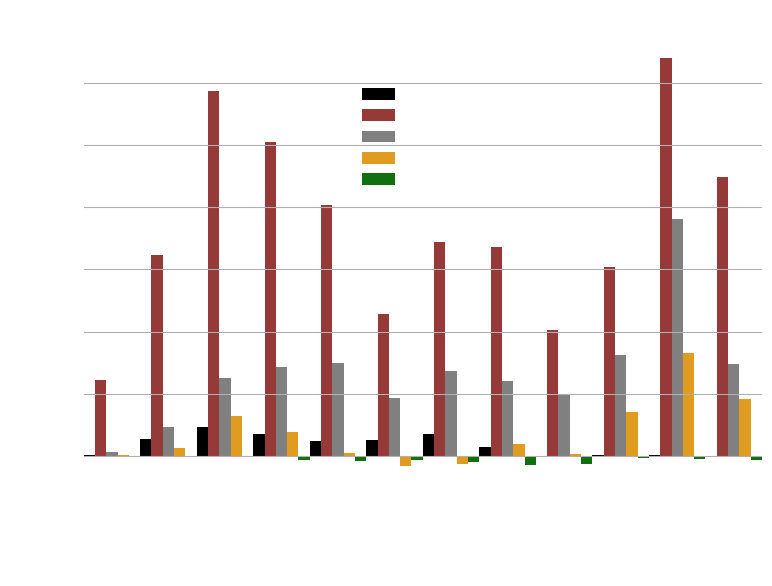

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=dm, x='Ano', y='value', hue='variable', palette=['black', 'brown', 'grey', 'orange', 'green'], width=1.)#, stack=True)
sns.despine(offset=10, trim=True);

#ax.bar_label(ax.containers[0], color='w')

ax.spines[['left','bottom']].set_visible(False)
#ax.set_yticks([])
ax.set_ylabel("")
ax.tick_params(axis='y', colors='w')
ax.grid(axis='y')

ax.set_xlabel("Ano", fontsize=18, color='w')
ax.set_title("Importação das fontes Portuguesas de energia em M€", loc='left', fontsize=18, color='w')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='w')
ax.text(0, 0.98, "Fonte: DGEG", va='top', transform=ax.transAxes, color='w')
ax.annotate("Fonte: DGEG", xy=(45,10), xycoords='figure points', color='w')

ax.legend(frameon=False, fontsize=12, loc=(0.4,0.65), labelcolor='w', labelspacing=.3)

plt.tight_layout()
plt.savefig("fontes_transparente.png", dpi=300, transparent=True)
#plt.savefig("importacoes_transparente.png", dpi=300, transparent=True)
plt.show()

In [9]:
#df.plot(kind='bar', stacked=True, color=['black', 'brown', 'blue', 'orange', 'green'])

In [17]:
df['Total'] = df

,Ano,Carvão,Petróleo e Derivados,Gás natural,Electricidade,Biomassas e biocombustíveis
0,1998,11,1224,65,11,0
1,2004,261,3233,462,130,0
2,2008,455,5881,1249,634,0
3,2012,342,5059,1432,375,-71
4,2014,231,4035,1493,44,-91
5,2016,248,2289,921,-172,-66
6,2018,356,3440,1371,-141,-100
7,2019,143,3368,1207,181,-155
8,2020,-1,2031,993,22,-132
9,2021,4,3043,1625,711,-41


In [22]:
col_list = list(df.drop(columns='Ano'))

In [23]:
df['Total'] = df[col_list].sum(axis=1)

In [24]:
df

,Ano,Carvão,Petróleo e Derivados,Gás natural,Electricidade,Biomassas e biocombustíveis,Total
0,1998,11,1224,65,11,0,1311
1,2004,261,3233,462,130,0,4086
2,2008,455,5881,1249,634,0,8219
3,2012,342,5059,1432,375,-71,7137
4,2014,231,4035,1493,44,-91,5712
5,2016,248,2289,921,-172,-66,3220
6,2018,356,3440,1371,-141,-100,4926
7,2019,143,3368,1207,181,-155,4744
8,2020,-1,2031,993,22,-132,2913
9,2021,4,3043,1625,711,-41,5342


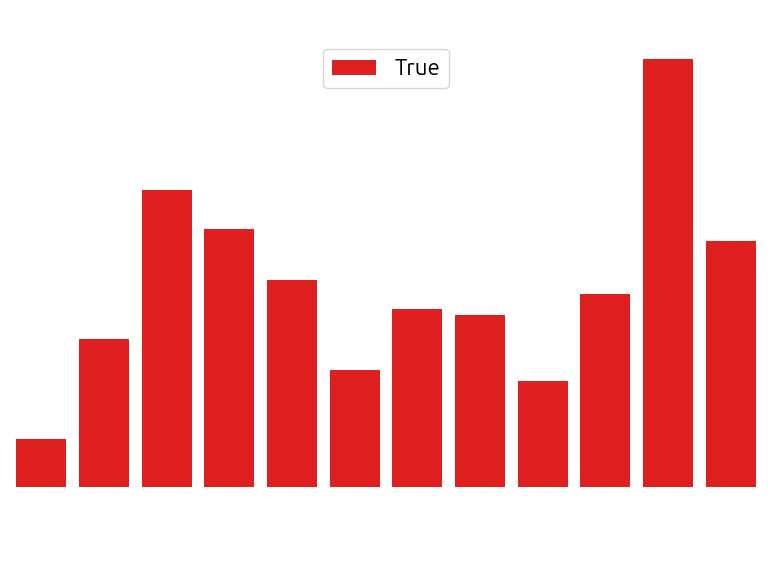

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df, x='Ano', y='Total',label=True, color='red')
sns.despine(offset=10, trim=True);

ax.bar_label(ax.containers[0], color='w')

ax.spines[['left', 'bottom']].set_visible(False)
ax.set_yticks([])
ax.set_ylabel("")

ax.set_xlabel("Ano", fontsize=18, color='w')
ax.set_title("Importações Portuguesas de energia em M€", loc='left', fontsize=18, color='w')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='w')
ax.text(0, 0.98, "Fonte: DGEG", va='top', transform=ax.transAxes, color='w')
#ax.annotate("Fonte: DGEG", xy=(35,10), xycoords='figure points', color='w')

plt.tight_layout()
plt.savefig("importacoes_energia_transparente.png", dpi=300, transparent=True)
#plt.savefig("importacoes_transparente.png", dpi=300, transparent=True)
plt.show()